In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARIMAResults,ARMAResults

In [4]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [5]:
from pmdarima import auto_arima

In [6]:
df=pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df.index.freq='D'

In [7]:
df=df[:120]

In [8]:
df2=pd.read_csv('../Data/TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq='MS'

# ARMA

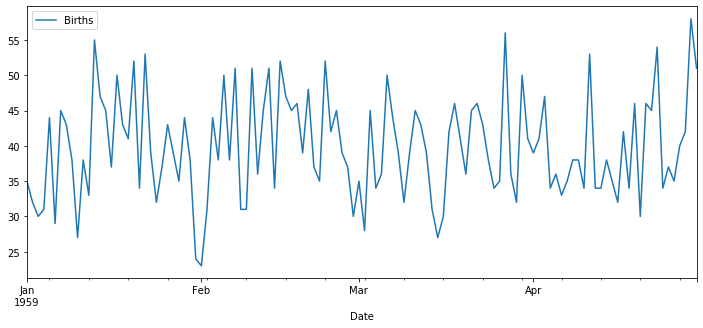

In [9]:
df.plot(figsize=(12,5))

In [10]:
#will conduct dicky fuller test to check for stationary or not

In [11]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [12]:
adf_test(df['Births']) 

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [13]:
auto_arima(df['Births'],seasonal=False).summary()

C:\Users\Jasar Althaf\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Sun, 17 May 2020   AIC                            823.489
Time:                        10:34:29   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
train=df.iloc[:90]
test=df.iloc[90:]

In [15]:
model=ARMA(train['Births'],order=(2,2))

In [16]:
results=model.fit()

In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Sun, 17 May 2020   AIC                            627.809
Time:                        10:34:30   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.500      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.800      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.556      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [18]:
start=len(train)
end=len(train)+len(test) - 1

In [19]:
pred=results.predict(start,end).rename('ARMA(2,2) pred')

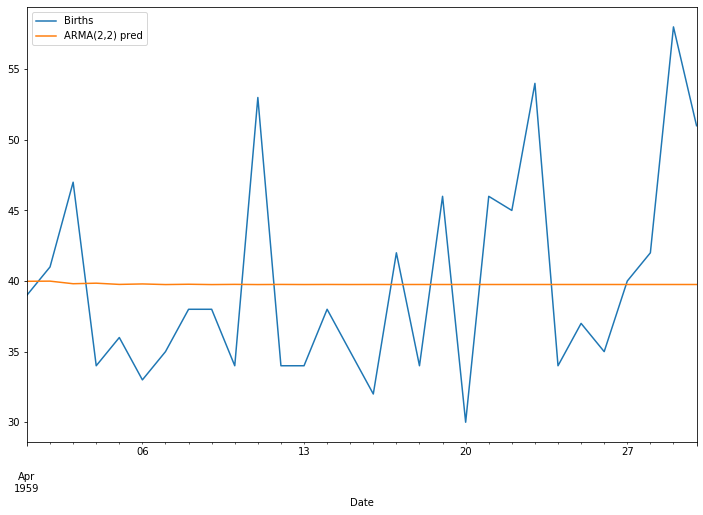

In [20]:

test.plot(legend=True,figsize=(12,8))
pred.plot(legend=True) #it forecasted the average value

In [21]:
test.mean()

Births    39.833333
dtype: float64

In [22]:
pred.mean() #mean it is able to identify but not the noise

39.77743529320699

# ARIMA

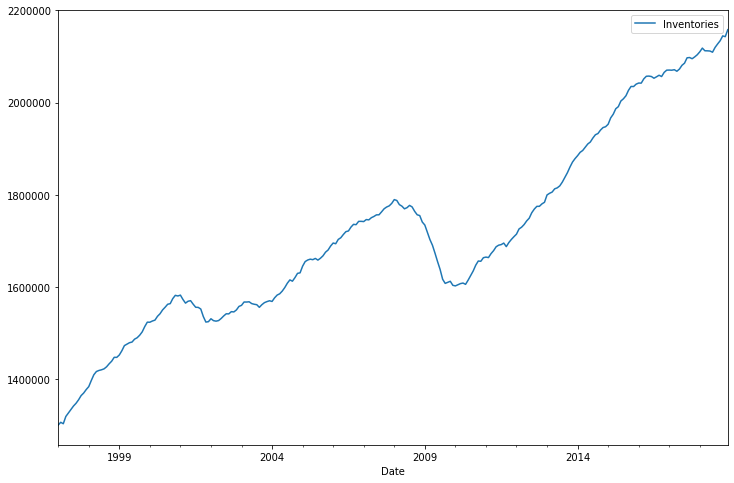

In [23]:
df2.plot(figsize=(12,8))

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
result=seasonal_decompose(df2['Inventories'],model='add')

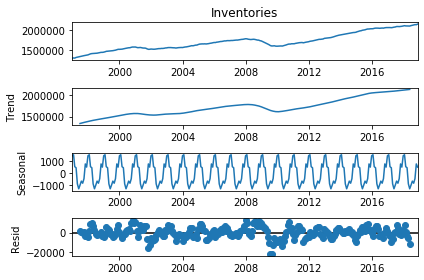

In [26]:
result.plot();

In [27]:
auto_arima(df2['Inventories'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Sun, 17 May 2020   AIC                           5348.037
Time:                        10:34:31   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
from statsmodels.tsa.statespace.tools import diff

In [29]:
df2['Diff1']=diff(df2['Inventories'],k_diff=1)

In [30]:
adf_test(df2['Diff1'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


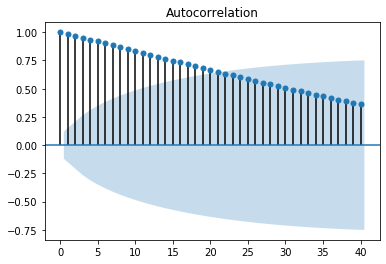

In [31]:
plot_acf(df2['Inventories'],lags=40);

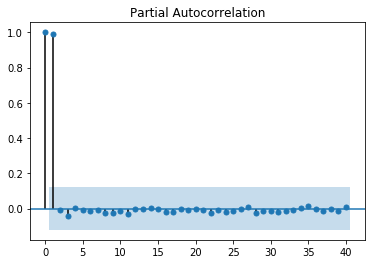

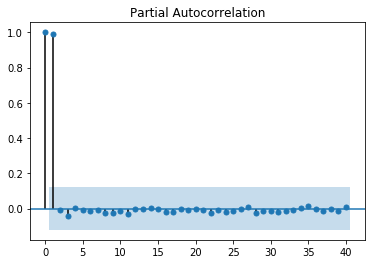

In [32]:
plot_pacf(df2['Inventories'],lags=40)

In [46]:
stepwisefit=auto_arima(df2['Inventories'],start_p=0,start_q=0,max_p=2,max_q=2,seasonal=
                      False,trace=False)
stepwisefit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Sun, 17 May 2020   AIC                           5348.037
Time:                        11:20:40   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
len(df2)

264

In [48]:
train=df2.iloc[:252]
test=df2.iloc[252:]

In [50]:
model=(train['Inventories'],order=(1,1,1))
results=model.fit()
results.summary()

SyntaxError: invalid syntax (<ipython-input-50-4c110c75c8a9>, line 1)

In [37]:
start=len(train)
end=len(train)+len(test) -1

In [38]:
pred=results.predict(start,end,typ='levels').rename('ARIMA(1,1,1) pred')

In [39]:
pred

2018-01-01    2.107141e+06
2018-02-01    2.110510e+06
2018-03-01    2.113858e+06
2018-04-01    2.117189e+06
2018-05-01    2.120503e+06
2018-06-01    2.123804e+06
2018-07-01    2.127090e+06
2018-08-01    2.130366e+06
2018-09-01    2.133630e+06
2018-10-01    2.136885e+06
2018-11-01    2.140131e+06
2018-12-01    2.143369e+06
Freq: MS, Name: ARIMA(1,1,1) pred, dtype: float64

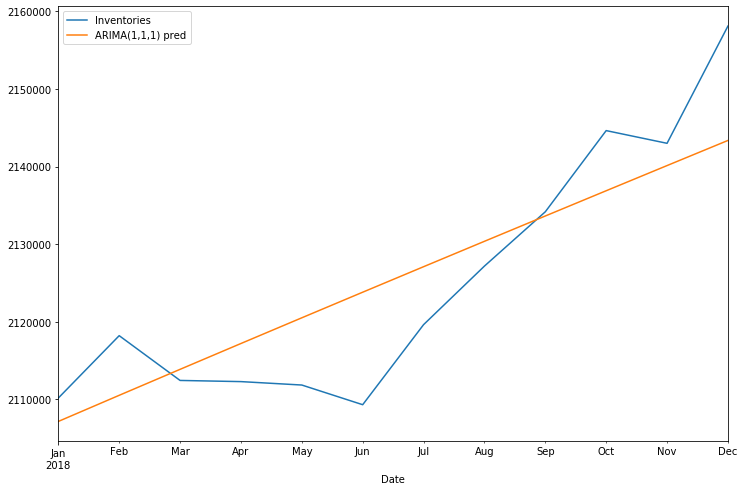

In [40]:
test['Inventories'].plot(figsize=(12,8),legend=True)
pred.plot(legend=True)

In [53]:
test.mean()

Inventories    2.125076e+06
Diff1          4.530333e+03
dtype: float64

In [54]:
pred.mean()

2125372.959382349

In [55]:
#forecating to future

In [56]:
model=ARIMA(df2['Inventories'],order=(1,1,1))
results=model.fit()

In [58]:
fcast=results.predict(len(df2),len(df2)+12,typ='levels').rename('ARIMA(1,1,1) forecasted')

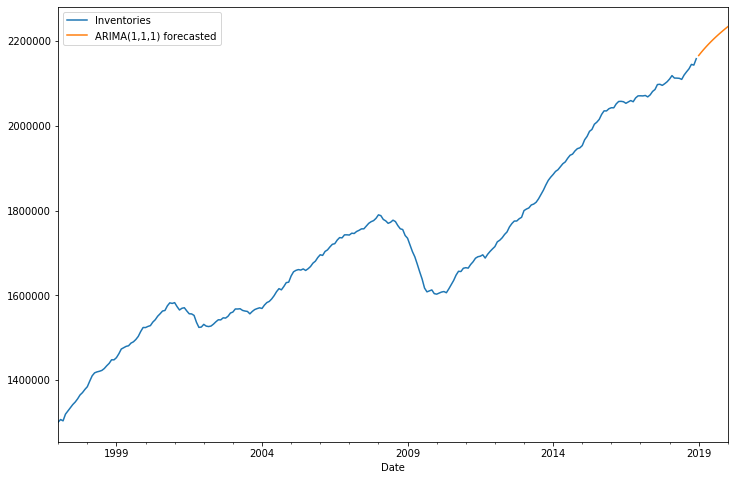

In [59]:
df2['Inventories'].plot(figsize=(12,8),legend=True)
fcast.plot(legend=True)